#  Business Problem Understanding

## Background

Customer lifetime value (CLV) adalah ukuran yang menunjukkan seberapa bernilai seorang pelanggan bagi perusahaan. Dengan mengetahui CLV, perusahaan dapat menentukan keuntungan yang diperoleh dari setiap pelanggan serta biaya yang diperlukan untuk mendapatkan pelanggan baru atau mempertahankan pelanggan yang sudah ada. Angka ini sangat penting bagi perusahaan yang ingin menargetkan pemasaran secara efektif kepada pelanggan yang bernilai tinggi dan memahami bagaimana perilaku pelanggan berubah seiring waktu. Sebagai contoh, perusahaan e-commerce besar seperti Amazon menggunakan analisis CLV untuk meningkatkan strategi bisnis mereka. Analisis yang dilakukan oleh Amazon menunjukkan bahwa peningkatan 5% dalam kepuasan pelanggan dapat meningkatkan CLV mereka sebesar 25% hingga 95%. Selain itu, Amazon menemukan bahwa biaya untuk mendapatkan pelanggan baru bisa 6 hingga 7 kali lebih tinggi dibandingkan dengan mempertahankan pelanggan yang sudah ada. Dengan memperhatikan faktor-faktor ini, Amazon mampu memiliki pelanggan dengan CLV yang sangat tinggi.

Dalam konteks perusahaan asuransi, mengetahui CLV dapat membantu meningkatkan berbagai aspek operasional perusahaan, seperti:

- Pemasaran: Menggunakan informasi CLV untuk mengidentifikasi pelanggan yang jarang mengajukan klaim dan membayar premi tinggi, sehingga pemasaran dapat difokuskan pada pelanggan yang memberikan keuntungan besar.
- Layanan Pelanggan: Menentukan metode yang tepat untuk setiap jenis pelanggan, sehingga biaya tinggi tidak dikeluarkan untuk pelanggan dengan CLV rendah.
- Keuangan dan Manajemen Risiko: Menghitung kontribusi keuntungan dari setiap pelanggan dan menentukan langkah yang perlu diambil jika pelanggan tersebut berhenti menggunakan layanan.

## Problem Statement

Customer lifetime value (CLV) dalam asuransi dihitung dari total premi yang dibayarkan dikurangi klaim dan biaya operasional. Menghitung CLV berdasarkan riwayat pelanggan memakan waktu lama, sehingga strategi bisnis mungkin terlambat diterapkan. Oleh karena itu, prediksi CLV diperlukan untuk mengidentifikasi pelanggan bernilai tinggi dan rendah. Dengan demikian, perusahaan dapat fokus pada pemasaran yang lebih efisien kepada pelanggan bernilai tinggi, meningkatkan efisiensi keseluruhan perusahaan, meskipun prediksi hanya berguna jika akurat.

##  Goals

Pemodelan regresi dapat digunakan untuk memprediksi nilai customer lifetime value (CLV) berdasarkan berbagai variabel pelanggan asuransi. Dengan bantuan machine learning, model ini dapat dibuat lebih akurat. Dalam proyek capstone modul 3 ini, kita akan membuat model untuk mengestimasi CLV pelanggan perusahaan asuransi. Prediksi CLV membantu perusahaan mengidentifikasi pelanggan bernilai tinggi dan rendah, sehingga strategi pemasaran dapat difokuskan pada pelanggan yang lebih menguntungkan. Ini tidak hanya meningkatkan efisiensi pemasaran tetapi juga membantu dalam pengambilan keputusan bisnis yang lebih baik.

#  Analytic Approach

1. Explantory Data Analysis (EDA)
1. Preprocessing
1. Benchmarking
1. Hyperparameter Tuning

### **Data Understanding**

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV     



In [3]:
df= pd.read_csv('data_customer_lifetime_value.csv')
df.rename({"EmploymentStatus" : "Employment Status"}, axis = 1, inplace = True) # Memperbaiki nama feature
df

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [32]:
# Memisahkan feature kategorikal dan numerikal
categorical = ["Vehicle Class", "Coverage", "Renew Offer Type", "Employment Status", "Marital Status", "Education", "Number of Policies"]
numerical = ["Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]

## **Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   Employment Status        5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [6]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


###  Missing Value

In [7]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
Employment Status          0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Tidak ada missing value

In [8]:
df.duplicated().sum()

618

In [10]:
#Menghapus data duplicated
df = df.drop_duplicates()

In [11]:
#hasil setelah menghapus data yang dupicated
df.duplicated().sum()

0

In [13]:
# Grouping jumlah Vehicle Class berdasarkan Coverage group 
df.groupby(['Vehicle Class', 'Coverage'])['Coverage'].count()

Vehicle Class  Coverage
Four-Door Car  Basic       1565
               Extended     788
               Premium      212
Luxury Car     Basic         64
               Extended      26
               Premium       11
Luxury SUV     Basic         57
               Extended      34
               Premium       10
SUV            Basic        584
               Extended     290
               Premium       89
Sports Car     Basic        154
               Extended      81
               Premium       27
Two-Door Car   Basic        676
               Extended     298
               Premium       85
Name: Coverage, dtype: int64

In [55]:
# Median setiap Vehicle Class
CLV_median = (df.groupby('Vehicle Class')['Customer Lifetime Value']
                   .median()
                   .sort_values(ascending=False)
                   .reset_index())

CLV_median.head()

,Vehicle Class,Customer Lifetime Value
0,Luxury SUV,15167.044020
1,Luxury Car,14510.443760
2,Sports Car,8774.738289
3,SUV,8613.464001
4,Four-Door Car,5324.387860


Coverage              Basic      Extended       Premium
Vehicle Class                                          
Four-Door Car   5041.299610   6347.717393   8291.562256
Luxury Car     14081.857550  17381.159775  11701.069850
Luxury SUV     13144.491010  17859.814650  11213.974100
SUV             8268.097460   9648.372776  13115.407510
Sports Car      8388.935630   9817.026936  10915.358770
Two-Door Car    4930.249517   6447.670406   8087.219475


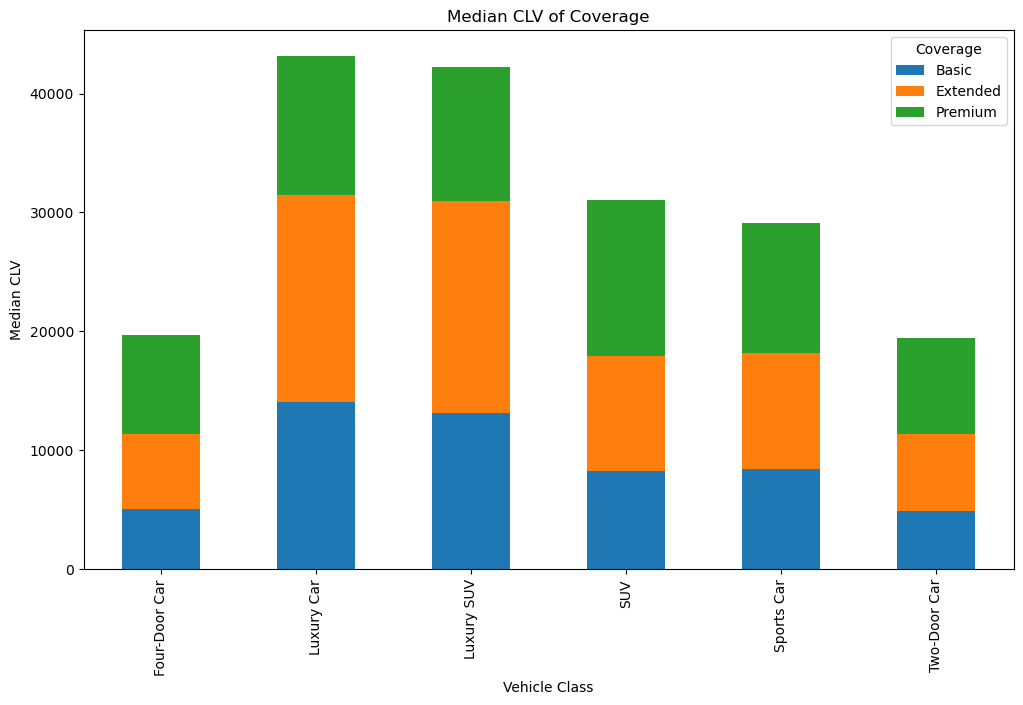

In [56]:
VC_median = df.pivot_table(index='Vehicle Class', columns='Coverage', values='Customer Lifetime Value', aggfunc='median')
print(VC_median)

plot = VC_median.plot.bar(stacked=True, figsize=(12, 7))
plot.set_xlabel('Vehicle Class')
plot.set_ylabel('Median CLV')
plot.set_title('Median CLV of Coverage');

Secara keseluruhan, median CLV untuk berbagai jenis kendaraan berada di sekitar $40.000. Namun, terdapat perbedaan yang mencolok di antara kelas-kelas kendaraan. Kendaraan dengan median CLV yang lebih tinggi biasanya dilengkapi dengan fitur keselamatan yang lebih canggih. Fitur-fitur ini membantu mengurangi risiko kerusakan saat terjadi kecelakaan. Selain itu, kendaraan dengan median CLV yang lebih tinggi cenderung memiliki nilai jual kembali yang lebih baik, yang pada akhirnya dapat menurunkan biaya kepemilikan kendaraan secara keseluruhan.

C:\Users\deans\AppData\Local\Temp\ipykernel_24948\938951266.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(categorical))


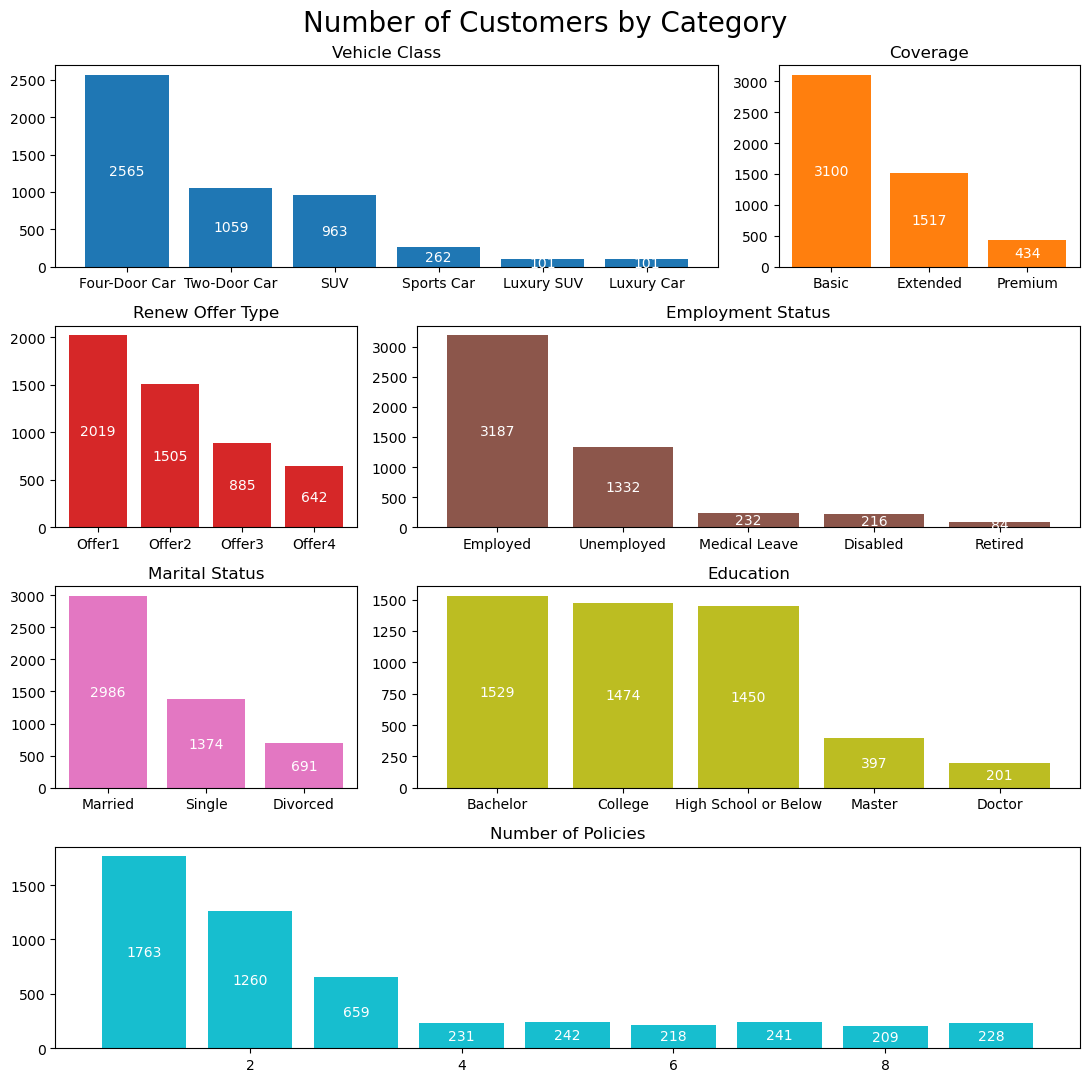

In [45]:
# Create figure and grid layout
fig = plt.figure(figsize=(11, 11), facecolor="none")
fig.suptitle("Number of Customers by Category", size=20)
gs = fig.add_gridspec(4, 3)

# Define axes
sp = [fig.add_subplot(gs[0, :2]), fig.add_subplot(gs[0, 2]), 
      fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1:]), 
      fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1:]), 
      fig.add_subplot(gs[3, :])]

colors = cm.get_cmap('tab10', len(categorical))

# Plot and label each category
for idx, col in enumerate(categorical):
    bar = df[col].value_counts()
    sp[idx].bar(bar.index, bar.values, color=colors(idx))
    sp[idx].set_title(col)
    sp[idx].bar_label(sp[idx].containers[0], label_type="center", color="white")

plt.tight_layout()
plt.show()

C:\Users\deans\AppData\Local\Temp\ipykernel_24948\2994535602.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(categorical))


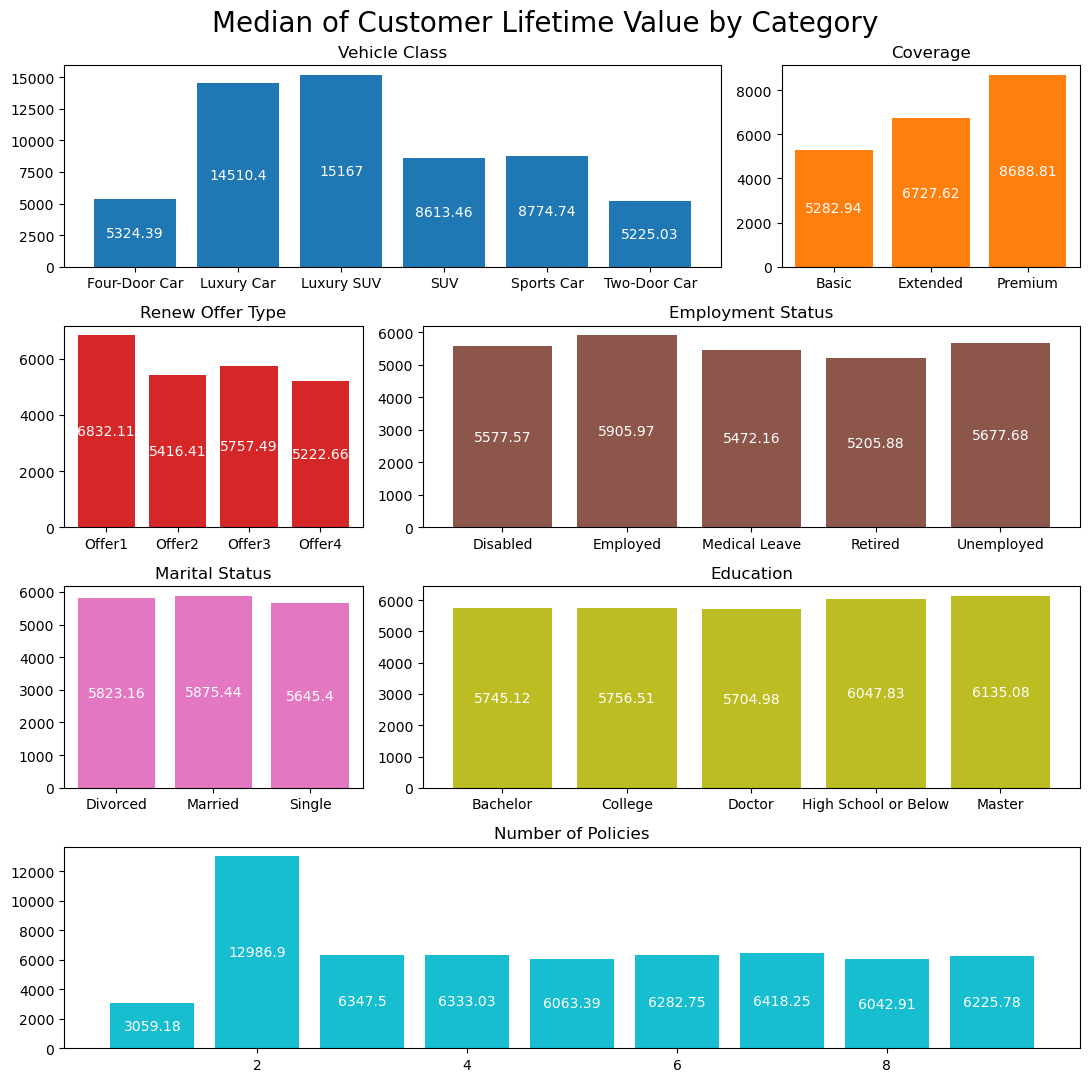

In [46]:
# Create figure and grid layout
fig = plt.figure(figsize=(11, 11), facecolor="none")
fig.suptitle("Median of Customer Lifetime Value by Category", size=20)
gs = fig.add_gridspec(4, 3)

# Define axes
sp = [fig.add_subplot(gs[0, :2]), fig.add_subplot(gs[0, 2]), 
      fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1:]), 
      fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1:]), 
      fig.add_subplot(gs[3, :])]

# Generate a color map for each plot
colors = cm.get_cmap('tab10', len(categorical))

# Plot and label median Customer Lifetime Value by category with different colors
for idx, col in enumerate(categorical):
    bar = df.groupby(col)["Customer Lifetime Value"].median()
    sp[idx].bar(bar.index, bar.values, color=colors(idx))  # Assign a different color
    sp[idx].set_title(col)
    sp[idx].bar_label(sp[idx].containers[0], label_type="center", color="white")

plt.tight_layout()
plt.show()

###  Numerical Features

In [51]:
df[numerical].describe()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


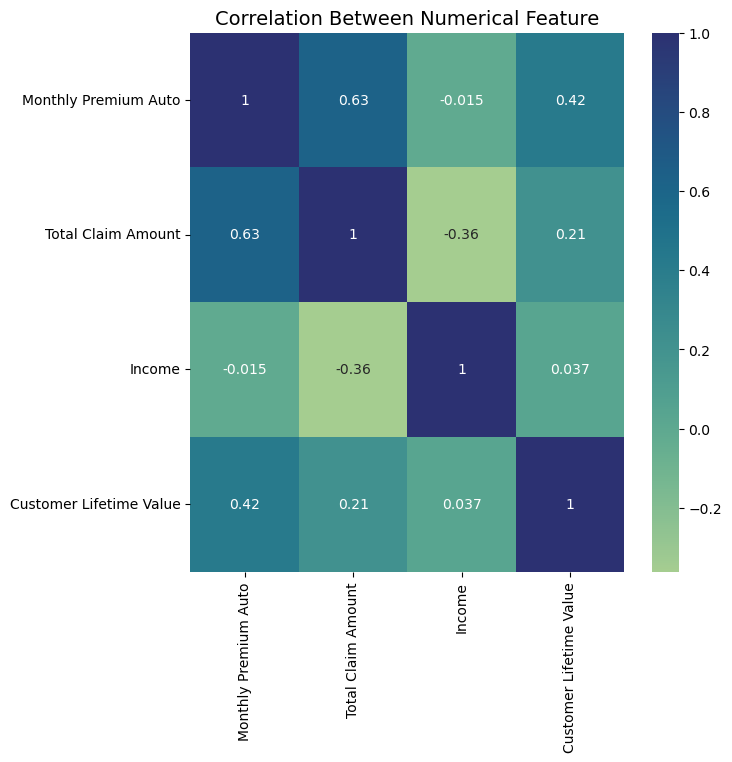

In [53]:
plt.figure(figsize=(7, 7), facecolor = "none")
sns.heatmap(df[numerical].corr(), annot = True, cmap = "crest")

plt.title("Correlation Between Numerical Feature", size = 14)
plt.show()

In [63]:
def outliers(dataset, feature):
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    
    iqr = q3 - q1
    
    global upper_limit, lower_limit
    
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    print(f"Upper Limit for {feature} variable is {upper_limit} and Lower Limit is {lower_limit}")

In [64]:
outliers(df, "Monthly Premium Auto")

Upper Limit for Monthly Premium Auto variable is 170.5 and Lower Limit is 6.5


Menghapus outliers pada Monthly Premium Auto dengan batas atas 170.5 Dollar tidak bisa dilakukan karena akan menghilangkan kelas Luxury Car dan Luxury SUV.

In [65]:
outliers(df, "Total Claim Amount")

Upper Limit for Total Claim Amount variable is 992.6433477500001 and Lower Limit is -192.74392225000005


Menghapus outliers pada Total Claim Amopunt dengan batas atas 992.64 Dollar tidak bisa dilakukan karena akan menghilangkan banyak data pada kelas Luxury Car dan Luxury SUV.

In [66]:
outliers(df, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


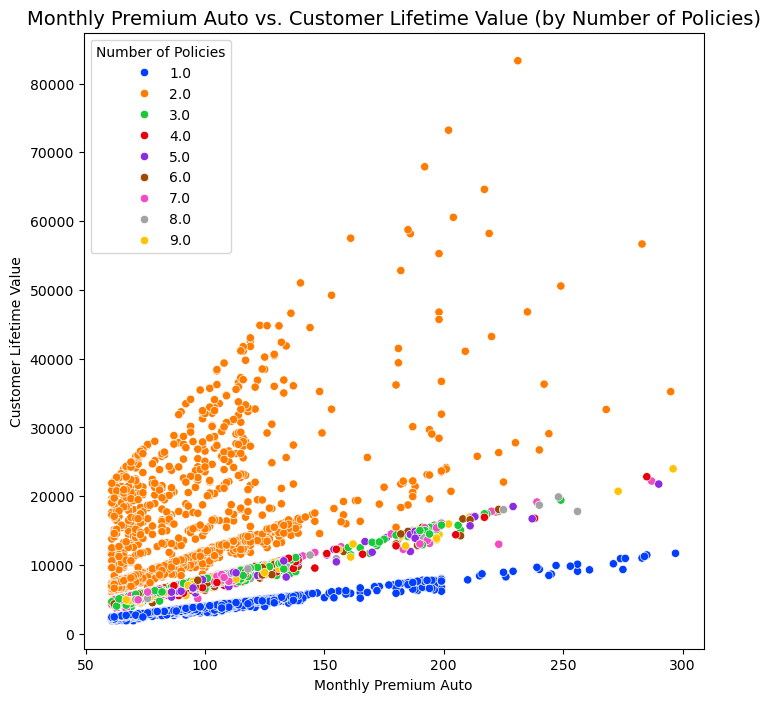

In [67]:
# Customer lifetime Value
plt.figure(figsize = (8,8), facecolor = "none")
sns.scatterplot(data = df, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "bright")

plt.title("Monthly Premium Auto vs. Customer Lifetime Value (by Number of Policies)", size = 14)
plt.show()

Semakin tinggi nilai "Monthly Premium Auto," semakin besar "Customer Lifetime Value" (CLV) pada jumlah polis yang sama. Pelanggan dengan 1 polis (titik biru) memiliki CLV terendah, sedangkan pelanggan dengan 2 polis memiliki CLV tertinggi. Namun, ada banyak outliers pada data dengan 2 polis, dan menghapusnya mungkin dapat meningkatkan performa model.

###  Outliers Removal from Dataset

In [68]:
outliers(df, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


In [69]:
(df["Customer Lifetime Value"] > upper_limit).sum()

449

`Terdapat 449 outliers pada kolom Customer Lifetime Value.`

In [70]:
df_clone = df[df["Customer Lifetime Value"] <= upper_limit].copy()

In [71]:
pd.set_option("display.max_colwidth", None)

summary = pd.DataFrame({
    "Number of Datas": [df_clone[col].count() for col in df_clone.columns],
    "Number of Types": [df_clone[col].nunique() for col in df_clone.columns],
    "Samples of Types": [list(df_clone[col].unique())[:9] for col in df_clone.columns]
}, index=df.columns)

summary

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,4602,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,4602,3,"[Extended, Basic, Premium]"
Renew Offer Type,4602,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,4602,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,4602,3,"[Divorced, Married, Single]"
Education,4602,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,4602,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,4602,160,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,4602,2979,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,4602,3309,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


In [75]:
print("BEFORE CLEANING")
display(df[numerical].describe())
print("AFTER CLEANING")
display(df_clone[numerical].describe())

BEFORE CLEANING


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


AFTER CLEANING


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4602.000000,4602.000000,4602.000000,4602.000000
mean,90.584528,420.104245,37587.835289,6325.184168
std,30.844160,279.398375,30665.844042,3320.547103
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.526302,0.000000,3708.569393
50%,80.000000,369.868595,34140.500000,5505.112198
75%,107.000000,541.740429,62212.250000,8169.469198
max,297.000000,2759.794354,99934.000000,16589.712370


Tidak ada perubahan range dari varible numerik untuk independen variabel setelah data outliers variabel Customer Lifetime Value dihapus.

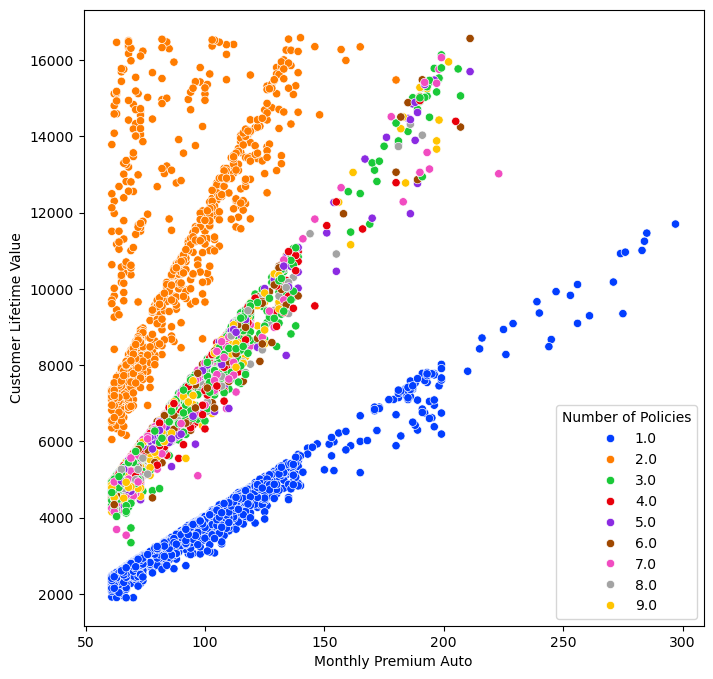

In [76]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_clone, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "bright")

plt.show()

###  Insight Summary from Explanatory Data Analysis

* Number of Policies dan Monthly Premium Auto pengaruhnya besar terhadap nilai Customer Lifetime Value adalah feature 


##  Data Preprocessing

## Mapping Ordinal Encoder

In [79]:
# Mapping digunakan untuk ordinal encoder
coverage_mapping = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
rot_mapping = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
education_mapping = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "Employment Status", "Marital Status"]), 
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = coverage_mapping), ["Coverage"]),                   
    ("rot_ordinal", ce.OrdinalEncoder(mapping = rot_mapping), ["Renew Offer Type"]),
    ("education_ordinal", ce.OrdinalEncoder(mapping = education_mapping), ["Education"])
], remainder = "passthrough")



## Data Spliting


Data set akan dibagi menjadi dua bagian, yaitu data train dan data set. Data train adalah data yang nantinya digunakan untuk melatih model machine learning. Data test digunakan untuk menguji apakah model yang sudah dibuat mampu memberikan nilai prediksi yang memuaskan. Perbandingan jumlah data train dan data test adalah 70% berbanding 30%.

In [94]:
x = df_clone.drop("Customer Lifetime Value", axis = 1)
y = df_clone["Customer Lifetime Value"]

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2020) 

## **Modeling**

##  Benchmark Model

Pada saat melakukan benchmark model, beberapa model akan melakukan cross validasi pada data train. Cross validasi dilakaukan dengan membagi data train menjadi beberapa bagian, pada kasus pembentukan model dataset ini adalah 5. Empat data diambil untuk di train menggunakan model lalu hasilnya dihitung menggunakan data sisnya, yang disebut data validasi. Pengulang dilakukan sehingga semua bagian data pernah menjadi data validasi. Nilai rata-ratanya dan standar deviasi akan dihitung untuk menentukan apakah model sudah cocok dengan dataset.

In [96]:
lr = LinearRegression()
lasso = Lasso(alpha = 0.001)
rid = Ridge(alpha = 0.001)
knn = KNeighborsRegressor(n_neighbors = 15)
knn_scaler = ColumnTransformer([                                                                  
    ("MinMax", MinMaxScaler(), [15, 16, 17])                                                          
], remainder = "passthrough")                                                                            
knn_plus = Pipeline([
    ("scaler", knn_scaler),
    ("knn", knn)
])
dt = DecisionTreeRegressor(max_depth = 3, random_state = 2020)                                    
rf = RandomForestRegressor(max_depth = 3, random_state = 2020, max_features = "log2")             
xgb = XGBRegressor(max_depth = 3, random_state = 2020)

In [101]:
hyperparameter = {"model" : [lr, lasso, rid, knn_plus, dt, rf, xgb]}

estimator = Pipeline([                                                 
    ("preprocess", transformer),
    ("model", lr)
])

crosval = KFold(n_splits = 5,shuffle = True, random_state = 2020)           
                                                                       
grid = GridSearchCV(estimator,
                    param_grid = hyperparameter,
                    cv = crosval,
                    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"], 
                    n_jobs = -1, refit = "neg_root_mean_squared_error")                                                         
                                                                                                                        
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mappin...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=2020, ...)]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [103]:
# Menampilkan score cross validasi
cross_val = ["Rank (based on RSME)", "Model", "Mean RMSE", "STD RMSE", "Mean MAE", "STD MAE", "Mean MAPE", "STD MAPE"]

crosval_res = pd.DataFrame(grid.cv_results_)[["rank_test_neg_root_mean_squared_error", "param_model", "mean_test_neg_root_mean_squared_error", 
                                                  "std_test_neg_root_mean_squared_error", "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error",
                                                  "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error"]]
crosval_res.columns = cross_val
crosval_res.set_index("Rank (based on RSME)", inplace = True)
crosval_res.sort_index()

,Model,Mean RMSE,STD RMSE,Mean MAE,STD MAE,Mean MAPE,STD MAPE
Rank (based on RSME),,,,,,,
1,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=3, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=2020, ...)",-929.063053,68.466049,-453.093611,15.178930,-0.066413,0.002428
2,"DecisionTreeRegressor(max_depth=3, random_state=2020)",-1377.547308,74.246974,-858.018350,42.633661,-0.120163,0.004188
3,"(ColumnTransformer(remainder='passthrough',\n transformers=[('MinMax', MinMaxScaler(), [15, 16, 17])]), KNeighborsRegressor(n_neighbors=15))",-2040.772023,84.961334,-1239.519548,26.434195,-0.179124,0.002787
4,"RandomForestRegressor(max_depth=3, max_features='log2', random_state=2020)",-2189.335233,71.969480,-1595.361351,49.416598,-0.302177,0.006587
5,Lasso(alpha=0.001),-2759.094408,111.095715,-2069.750742,71.342632,-0.377266,0.009030
6,Ridge(alpha=0.001),-2759.095285,111.096029,-2069.751507,71.341969,-0.377266,0.009030
7,LinearRegression(),-2759.095507,111.096159,-2069.751629,71.341707,-0.377266,0.009030


##  Prediction with Test Set

In [104]:
xgb = XGBRegressor(max_depth = 3, random_state = 2020)
estimator = Pipeline([
    ("transformer", transformer),
    ("model", xgb)
])

estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return pd.DataFrame({"RMSE" : rmse, "MAE" : mae, "MAPE" : mape}, index = [model_name])

regression_score("XG_Boost", y_test, y_pred)

,RMSE,MAE,MAPE
XG_Boost,950.767032,455.642562,0.06837


Berdasarkan hasil prediksi dengan data uji, diperoleh nilai RMSE sebesar 950.767032 Dollar dan nilai MAPE sebesar 6.8%. Meskipun hasil ini cukup memuaskan, ada kemungkinan hasilnya bisa lebih baik dengan menggunakan Hyperparameter Tuning.

##  Hyperparameter Tuning

In [105]:
# Memasukan parameter-parameter yang digunakan untuk Hyperparameter Tuning
hyperparameter = [
    {"model__learning_rate" : [1, 0.1, 0.05, 0.005],
     "model__n_estimators" : [20,200,400,4000],
     "model__max_depth" : [3,4,5,6],
     "model__gamma" : [0,1,2,3]}
]

In [106]:
# Membuat grid search untuk mendapatkan nilai error paling rendah
grid = GridSearchCV(estimator,
                    param_grid = hyperparameter,
                    cv = crosval,
                    scoring = "neg_root_mean_squared_error",
                    n_jobs = -1)

In [107]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mappi...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid=[{'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [1, 0.1, 0.05, 0.005],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [20, 200, 400, 4000]}],
             scoring='neg_root_mean_squared_error')

In [108]:
pd.DataFrame(grid.cv_results_)[["params", "mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score").head()

,params,mean_fit_time,mean_test_score,std_test_score,rank_test_score
229,"{'model__gamma': 3, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.185985,-906.951381,64.141238,1
165,"{'model__gamma': 2, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.181053,-906.951384,64.141237,2
101,"{'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.192057,-906.951384,64.141237,2
37,"{'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.182057,-906.951384,64.141237,2
169,"{'model__gamma': 2, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}",0.271155,-910.799893,88.457889,5


Hasil terbaik dari model XG_Boost :
- Model gamma 3
- Model learning_rate 0.05
- Model max_depth 4
- Model n_estimator 200

## Prediction with Tuned Model

In [109]:
tuned_estimator = grid.best_estimator_
tuned_estimator.fit(x_train, y_train)
y_pred_tuned = tuned_estimator.predict(x_test)
display(regression_score("Before Tuning", y_test, y_pred), regression_score("After Tuning", y_test, y_pred_tuned))

,RMSE,MAE,MAPE
Before Tuning,950.767032,455.642562,0.06837


,RMSE,MAE,MAPE
After Tuning,914.846809,382.027641,0.050532


Setelah tuning, terdapat penurunan error yang signifikan pada beberapa metrik evaluasi. Nilai RMSE turun sebesar 36 dollar, menunjukkan peningkatan akurasi prediksi secara keseluruhan. Penurunan lebih besar terjadi pada MAE (Mean Absolute Error) yang berkurang 73 dollar, serta MAPE (Mean Absolute Percentage Error) yang berkurang 1,8%. Hal ini menunjukkan bahwa hasil tuning model sangat baik dan memberikan prediksi yang lebih akurat. Oleh karena itu, model ini dipilih sebagai model akhir yang akan digunakan untuk deployment.

##  Model Explanation

In [110]:
features = (list(tuned_estimator[0].transformers_[0][1].get_feature_names_out()) +
            tuned_estimator[0].transformers_[1][2] +
            tuned_estimator[0].transformers_[2][2] +
            tuned_estimator[0].transformers_[3][2] +
            list(x_train.columns[tuned_estimator[0].transformers_[4][2]]))

## **Feature Importance**

<Figure size 800x800 with 0 Axes>

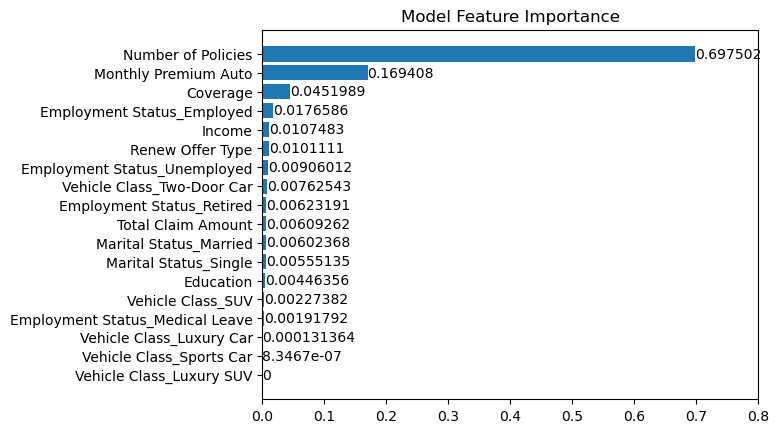

In [111]:
feature_importance = pd.DataFrame({"Importances" : tuned_estimator[1].feature_importances_}, index = features).sort_values("Importances")

plt.figure(figsize = (8,8))
fig, ax = plt.subplots(facecolor = "none")
bars = ax.barh(feature_importance.index, feature_importance["Importances"].values)
ax.set_xlim([0,0.8])
ax.bar_label(bars)
plt.title("Model Feature Importance")

plt.show()

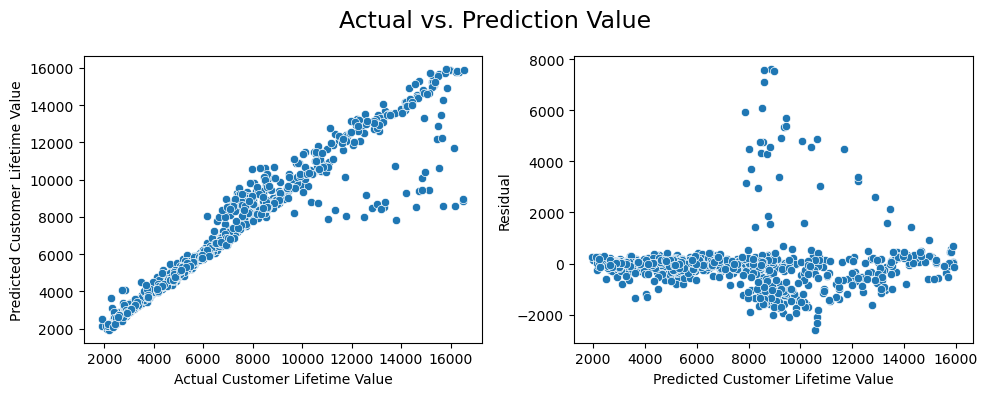

In [118]:
fig, axs =  plt.subplots(1, 2, figsize=(10, 4), facecolor = "none")

sns.scatterplot(y = y_pred_tuned, x = y_test, ax = axs[0])
axs[0].set_xlabel("Actual Customer Lifetime Value")
axs[0].set_ylabel("Predicted Customer Lifetime Value")

sns.scatterplot(x = y_pred_tuned, y = y_test - y_pred_tuned, ax = axs[1])
axs[1].set_xlabel("Predicted Customer Lifetime Value")
axs[1].set_ylabel("Residual")

fig.suptitle("Actual vs. Prediction Value", size = 17)
fig.tight_layout()

Berdasarkan grafik Actual vs. Prediction Value, terlihat bahwa model prediksi Customer Lifetime Value (CLV) cukup akurat untuk nilai CLV yang rendah. Namun, untuk prediksi CLV yang tinggi (di atas 80.000), model menunjukkan performa yang kurang memuaskan. Beberapa data menunjukkan bahwa nilai CLV aktual yang tinggi diprediksi berada di kisaran 8.000 hingga 10.000, mengindikasikan adanya bias dalam model. Selain itu, sebagian besar data dengan residual tinggi menunjukkan undervaluation, di mana nilai prediksi lebih rendah dari nilai aktual. Ini menunjukkan bahwa model ini cukup andal untuk mengidentifikasi pelanggan dengan CLV rendah.

#  Conclusion & Recomendation

##  Conclusion

- Model yang dihasilkan memiliki nilai RMSE sebesar 914.85 Dollar, MAE sebesar 382.03 Dollar, dan MAPE sebesar 1,8%. Ini berarti prediksi CLV model ini dapat meleset sekitar 4,8% dari nilai sebenarnya. Walaupun prediksi untuk beberapa data mengalami bias, model ini tetap cukup andal untuk memperkirakan CLV pada nilai yang lebih rendah.
- Kinerja model ini juga dipengaruhi oleh batasan maksimum dan minimum dari data numerik yang digunakan serta kategori dari variabel-variabel kategorikal.
- Berdasarkan analisis model, fitur yang paling berdampak terhadap CLV adalah Number of Policies, diikuti oleh Monthly Premium Auto dan Coverage.
- Dari analisis data eksploratif, ditemukan bahwa pelanggan dengan satu polis memiliki CLV yang relatif rendah, sedangkan pelanggan dengan dua polis cenderung memiliki CLV yang lebih tinggi. Menariknya, pelanggan dengan lebih dari dua polis menunjukkan CLV yang berada di antara pelanggan dengan satu dan dua polis.
- Selain itu, terlihat adanya kenaikan CLV seiring dengan meningkatnya Monthly Premium Auto, yang didukung oleh hasil uji korelasi antara kedua variabel dengan nilai korelasi 0,42.
- Terakhir, analisis grafik median Customer Lifetime Value berdasarkan jenis Coverage menunjukkan bahwa pelanggan dengan Premium Coverage cenderung memiliki CLV lebih tinggi, sementara pelanggan dengan Basic Coverage cenderung memiliki CLV yang lebih rendah.

##  Recomendation

- Sebaiknya model difokuskan untuk mengidentifikasi pelanggan dengan CLV rendah dibandingkan mencari yang ber-CLV tinggi, karena prediksi CLV tinggi berisiko undervaluation dan dapat menyebabkan pelanggan berpotensi tinggi terabaikan dalam proses seleksi.
- Jika saat deployment hasil prediksi kurang memuaskan, pertimbangkan melakukan feature engineering pada variabel yang memiliki banyak outlier, seperti menggunakan metode binning. Ini dapat membantu menangani outlier tanpa perlu menghapus data, sehingga informasi berharga tetap dipertahankan.
- Dari analisis data, ditemukan bahwa pelanggan dengan 2 polis cenderung memiliki CLV lebih tinggi dibandingkan dengan pelanggan lainnya. Jika model yang lebih interpretatif seperti regresi linear ingin digunakan, maka one-hot encoding pada variabel ini dapat diterapkan untuk memperbaiki kinerja model.
- Pada analisis dataset sebelum pembersihan, perbandingan antara Customer Lifetime Value, Monthly Premium Auto, dan Number of Policies menggunakan scatter plot menunjukkan beberapa contextual outliers. Outlier tersebut memiliki CLV jauh lebih tinggi dari rata-rata pelanggan dengan 2 polis. Tidak ada variabel dalam dataset yang dapat menjelaskan mengapa outlier ini muncul. Oleh karena itu, disarankan untuk menambah variabel baru, seperti durasi pelanggan menjadi peserta asuransi atau frekuensi klaim yang dilakukan, untuk membantu menjelaskan fenomena ini.

# Appendix A Saving The Model

##  Saving The Model Using Pickle

In [113]:
# Menyimpan model mengggunakan pickle untuk dideploy
import pickle

tuned_estimator.fit(x,y) # model terbaik difit dengan keleruruhan data, karena semakain banyak data, seharusnya semakin baik model bekerja

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'Employment Status',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordin...
                              feature_types=None, gamma=3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=2020, ...))])

In [114]:
# Menyimpan model
pickle.dump(tuned_estimator, open("Customer Lifetime Value Estimator.sav", "wb"))